In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

# csv 파일 이름들 가져오기

In [2]:
import os

base_path = "../coin_data/days"
file_list = os.listdir(base_path)

# 하나의 암호화폐에서 15% 이상 급 상승한 날의 30일 이전부터의 DataFrame들을 가져오는 함수 선언

In [3]:
def get_bull_and_bear_dfs(df, bear_or_bull='bull'):
    if bear_or_bull == 'bull':
        filted_df = df[df.change_rate > 0.15]
    elif bear_or_bull == 'bear':
        filted_df = df[df.change_rate < -0.15]
    else:
        raise ValueError("Invalid value for 'bear_or_bull'. Use 'bull' or 'bear'.")

    filted_df_index = filted_df.index

    dfs = []
    for index in filted_df_index:
        df_30days = df.iloc[index-30:index + 1]
        if len(df_30days) >= 30:
            dfs.append(df_30days)

    if len(dfs)!=0:
        return dfs
    else:
        return None

# 30일간의 DataFrame을 받아 close, trade_volume, change_rate의 추세선을 그리는 함수를 선언

In [4]:
# 그래프를 그리는 함수 정의
def plot_graph(df, axis):
    columns_to_plot = ["close", "trade_volume", "change_rate"]  # 그래프를 그릴 열(column) 이름들
    log_df = np.log1p(df[columns_to_plot])
    x_range = range(len(df))
    
    for col_index in range(len(columns_to_plot)):
        col_name = columns_to_plot[col_index]
        
        # 각 열의 마지막 값
        last_value = log_df[col_name].iloc[-1]
        
        # y 데이터를 조정하여 마지막 값이 0이 되도록 함
        log_df[col_name] -= last_value
    
        sns.lineplot(
            x=x_range,
            y=col_name,
            data=log_df,
            ax=axis[col_index],
            alpha=0.1
        )
        axis[col_index].set_title(col_name)


# 모든 csv를 참고하여 급 상승 기준 최근 30일간의 추세선 그리기

100%|██████████| 101/101 [01:54<00:00,  1.13s/it]


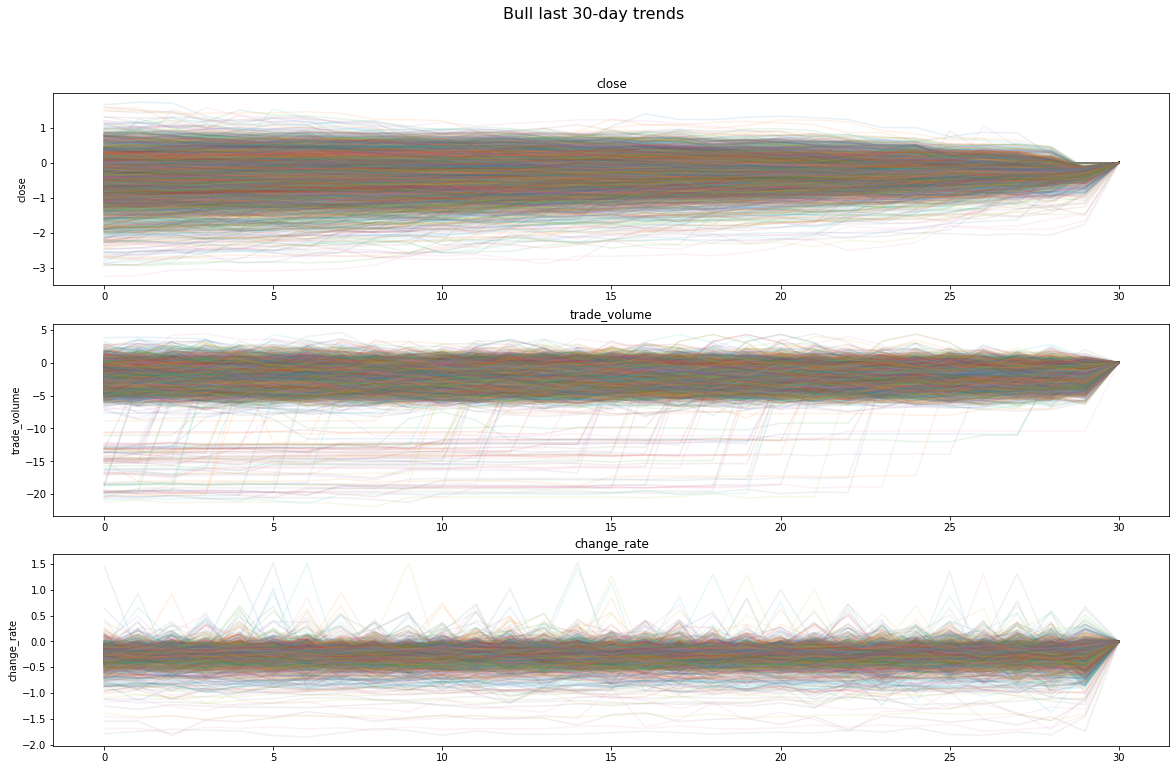

In [7]:
# 그래프 subplot 생성
fig, axis = plt.subplots(3, 1, figsize=(20, 12))

# 파일 리스트를 순회하면서 데이터 처리
for file_path in tqdm(file_list):
    # CSV 파일 불러오기
    df = pd.read_csv(os.path.join(base_path, file_path))
    
    # bull_df 추출
    bull_dfs = get_bull_and_bear_dfs(df, bear_or_bull="bull")
    
    if bull_dfs:
        for bull_df in bull_dfs:
            # 그래프 그리기 함수 호출
            plot_graph(bull_df, axis)

# 그래프 제목 설정
plt.suptitle(f'Bull last 30-day trends', fontsize=16)

# 그래프 표시
plt.show()